# Read in all h5ad file and clustering
@author ChenRui-Xia

In [1]:
import os
os.chdir('/rd2/user/xiacr/sle/')
results_file = 'output_file/scanpy/all_pbmc/pbmc260k.h5ad' 

## Read and concat or h5 files

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

import glob
import anndata as ad
import collections

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=160, facecolor='white', fontsize=10)

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5


In [4]:

file_list = glob.glob('data/10x_rna/*.h5')

In [5]:
adatas = []
for file in file_list:
    tmp_adata = sc.read_10x_h5(file)
    tmp_adata.var_names_make_unique()
    tmp_adata.obs['sample'] = file.split('/')[2].split('_')[0]
    adatas.append(tmp_adata)

reading data/10x_rna/HXR2_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/LGY_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/WYF2_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/LL2_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/LL_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/XYY_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/WYF_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/ZMY1_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/ZPP_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/ZS_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/GZR_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:04)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/WH2_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:07)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/HXX_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:06)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/WH1_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/XH_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/QJY_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/ZH_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/WYY_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/ZPP2_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/XYY2_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:04)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/GW_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:05)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading data/10x_rna/HXR_rna.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:07)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
adata = adatas[0].concatenate(adatas[1:])
adata.obs['sample'].value_counts()

WH2     23628
ZPP     18729
LGY     18268
GZR     17817
HXX     16750
XYY2    15127
LL2     14138
GW      13931
ZMY1    12596
HXR2    12060
WYF     11948
ZH      11876
HXR     11705
WYF2    11551
WYY     11430
ZS      11131
ZPP2     9501
XH       8545
QJY      5891
WH1      4622
XYY      3637
LL       1866
Name: sample, dtype: int64

## quality control

In [7]:
adata

AnnData object with n_obs × n_vars = 266747 × 36601
    obs: 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

normalizing counts per cell
    finished (0:01:52)


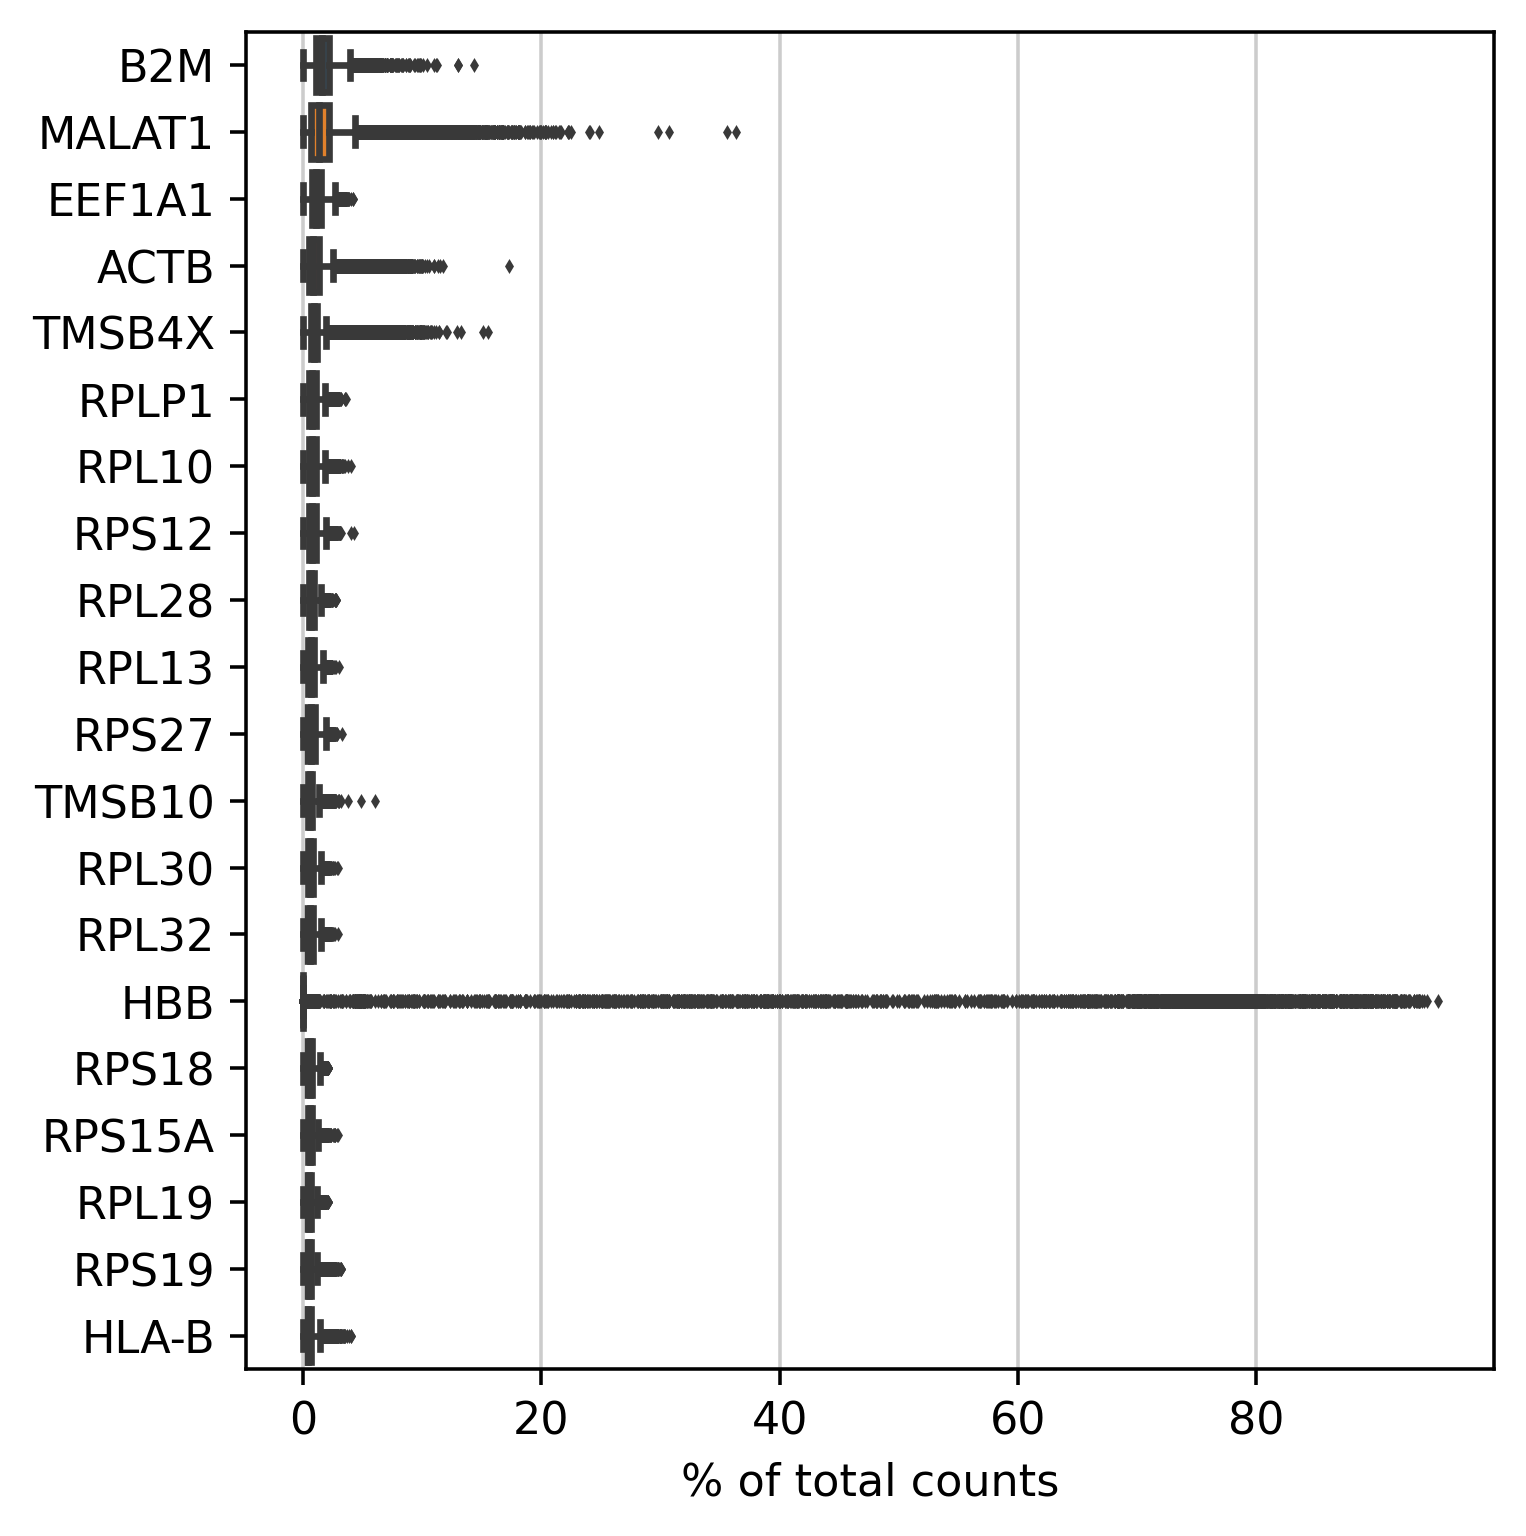

In [8]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [9]:
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1327 cells that have less than 300 genes expressed
filtered out 10611 genes that are detected in less than 3 cells


In [10]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [11]:
# filter out cells with high HBB gene ratio
hbb_ratio = np.squeeze(np.asarray(adata[:,'HBB'].X[:,0].todense())) / adata.obs['total_counts'].to_numpy()
np.where(hbb_ratio >= 0.4)[0].size
adata = adata[~adata.obs_names.isin(adata.obs_names[np.where(hbb_ratio >= 0.4)[0]]),:]

In [12]:
adata

View of AnnData object with n_obs × n_vars = 264312 × 25990
    obs: 'sample', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/anndata/_core/anndata.py:1236: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
Trying to set attribute `.var` of view,

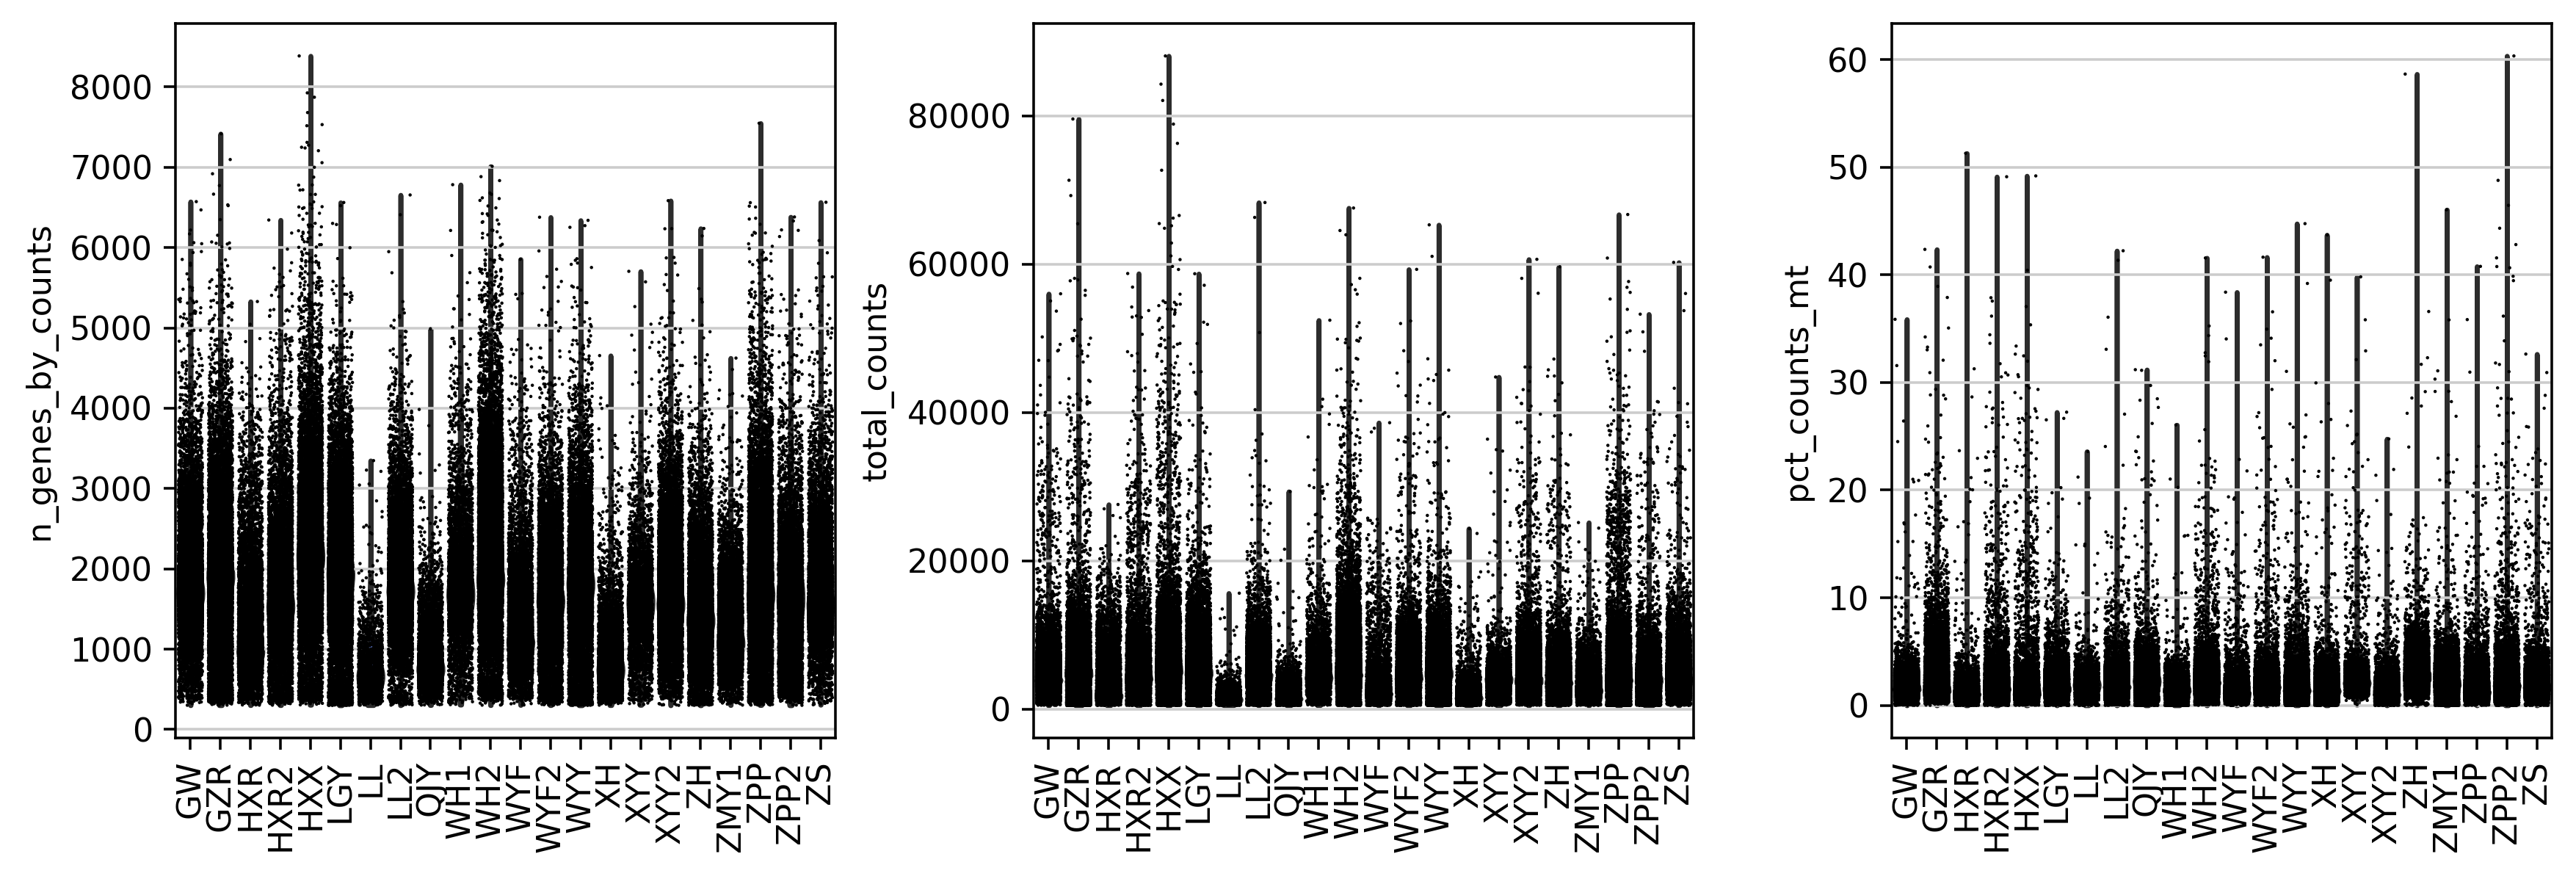

In [13]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],groupby='sample', rotation= 90,
             jitter=0.4, multi_panel=True,)

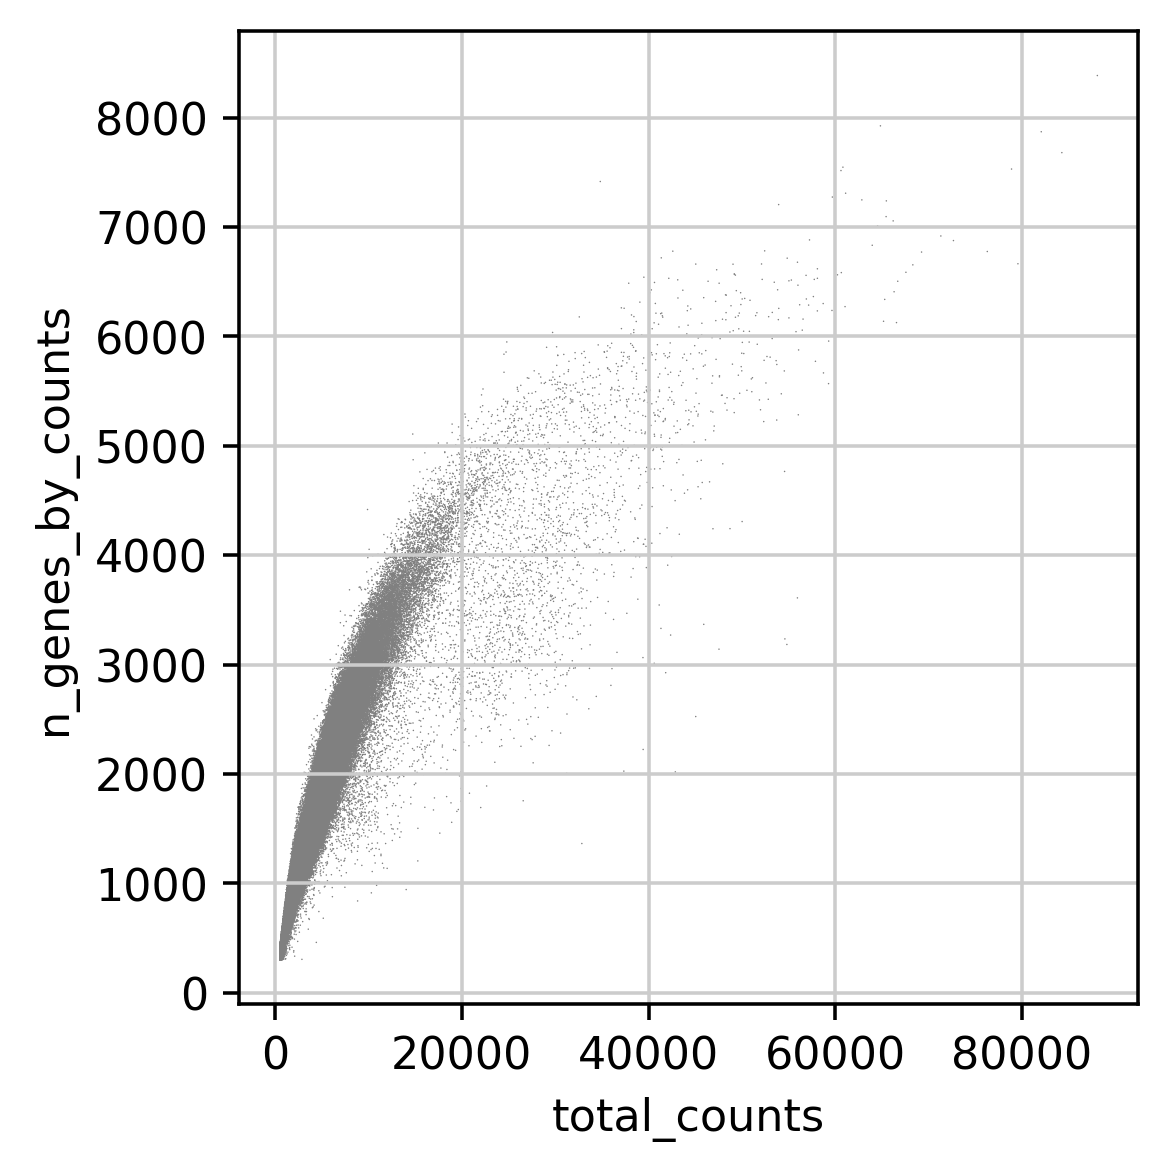

In [14]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [15]:
adata = adata[(adata.obs.n_genes_by_counts < 6000) & 
              (adata.obs.total_counts < 40000) &
              (adata.obs.pct_counts_mt <20) , :]

In [16]:
adata

View of AnnData object with n_obs × n_vars = 263612 × 25990
    obs: 'sample', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'sample_colors'

## single cell normal analysis

In [17]:
sc.pp.highly_variable_genes(adata, flavor ='seurat_v3',n_top_genes =2500, batch_key ='sample') # must specify n_top_genes when using seurat v3

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


Trying to set attribute `._uns` of view, copying.


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:03)


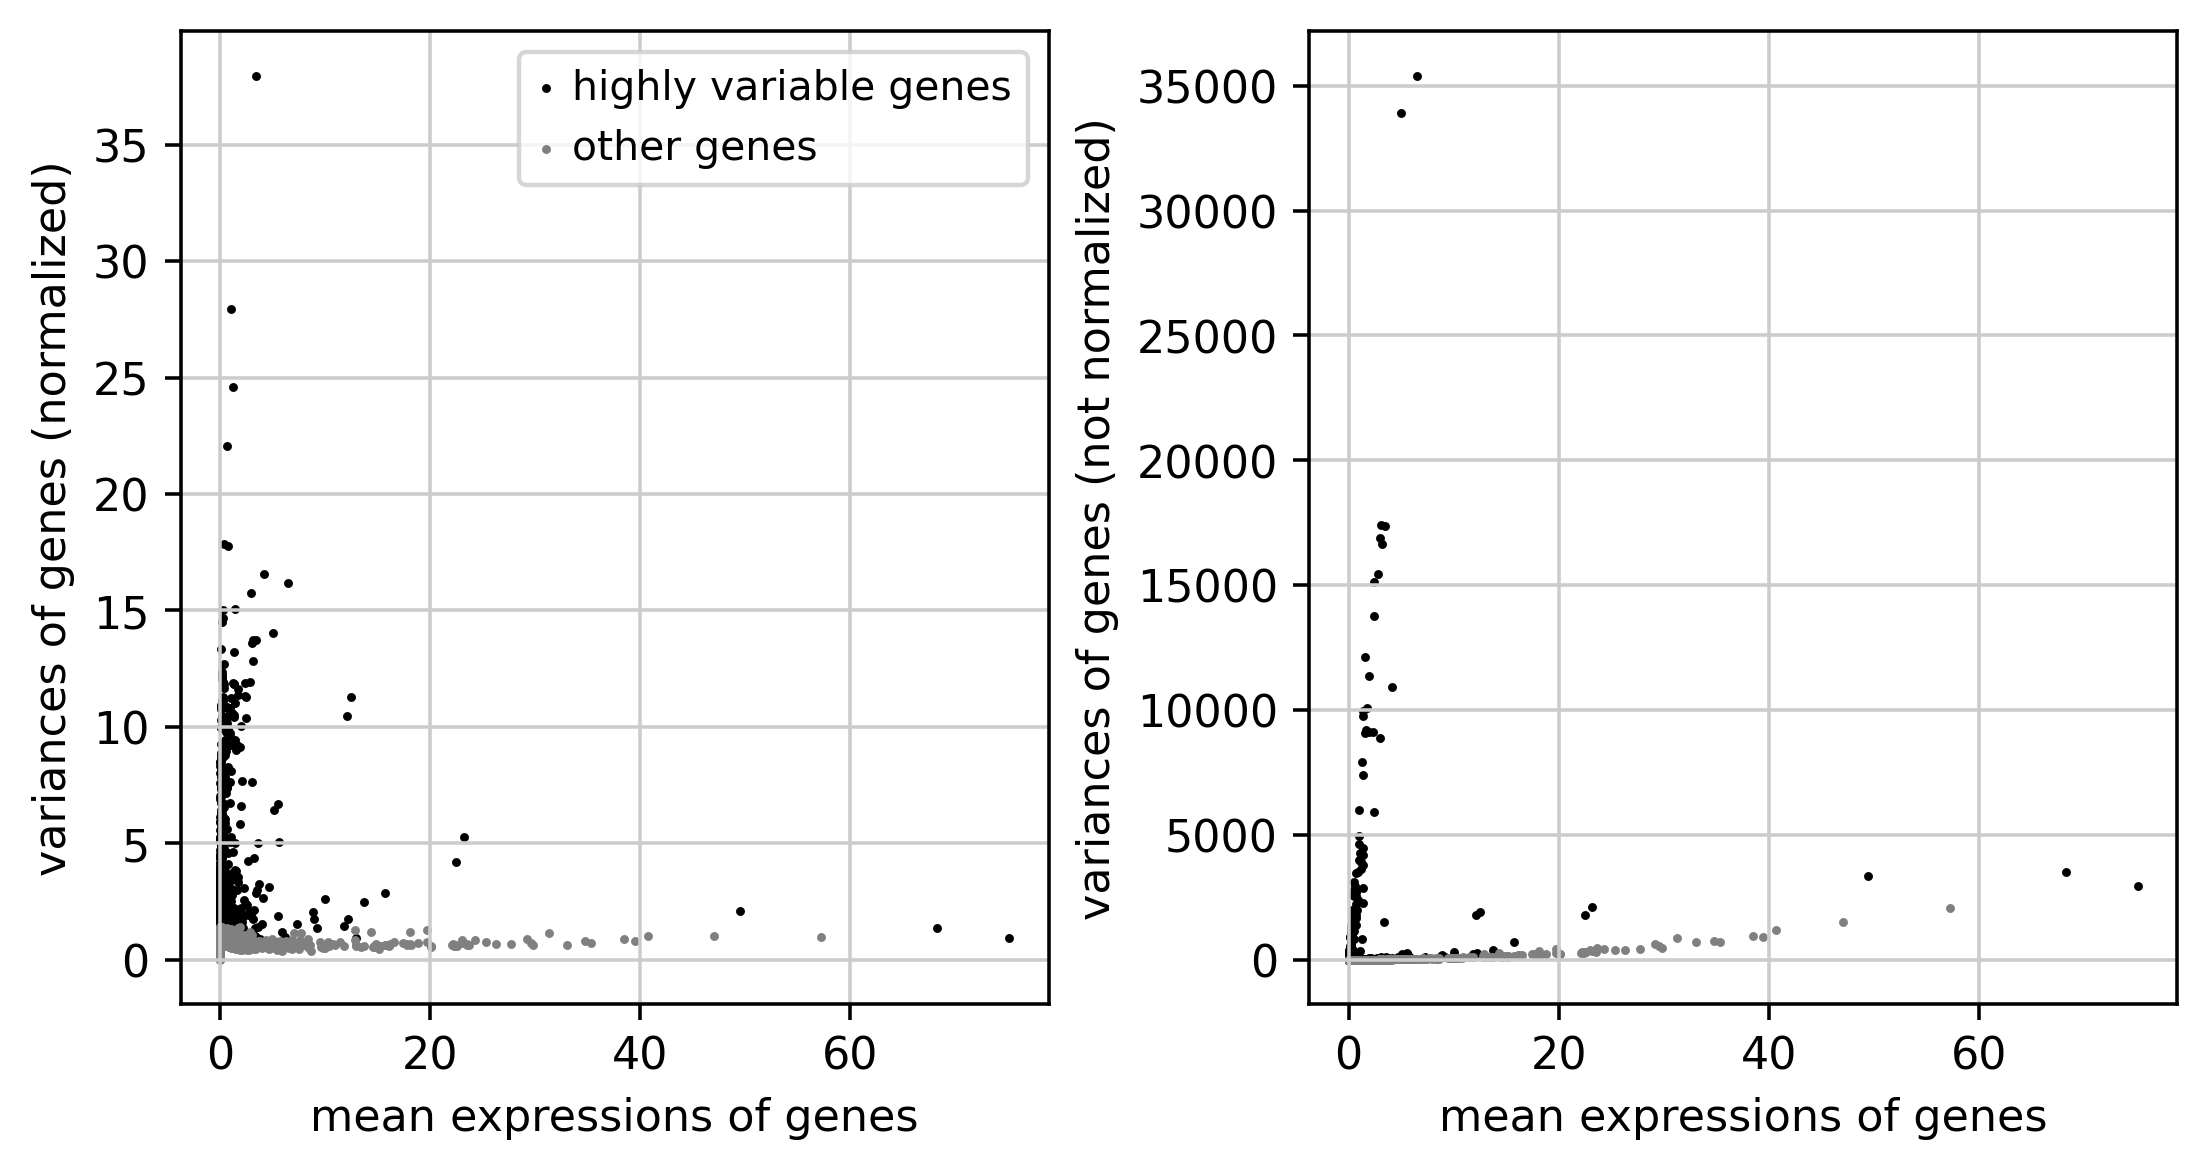

In [19]:
sc.pl.highly_variable_genes(adata)

In [20]:
adata.raw = adata # You can get back an AnnData of the object in .raw by calling .raw.to_adata().
adata = adata[:, adata.var.highly_variable]

In [21]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) # long time

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:43:35)


In [22]:
sc.pp.scale(adata, max_value=10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:03:13)


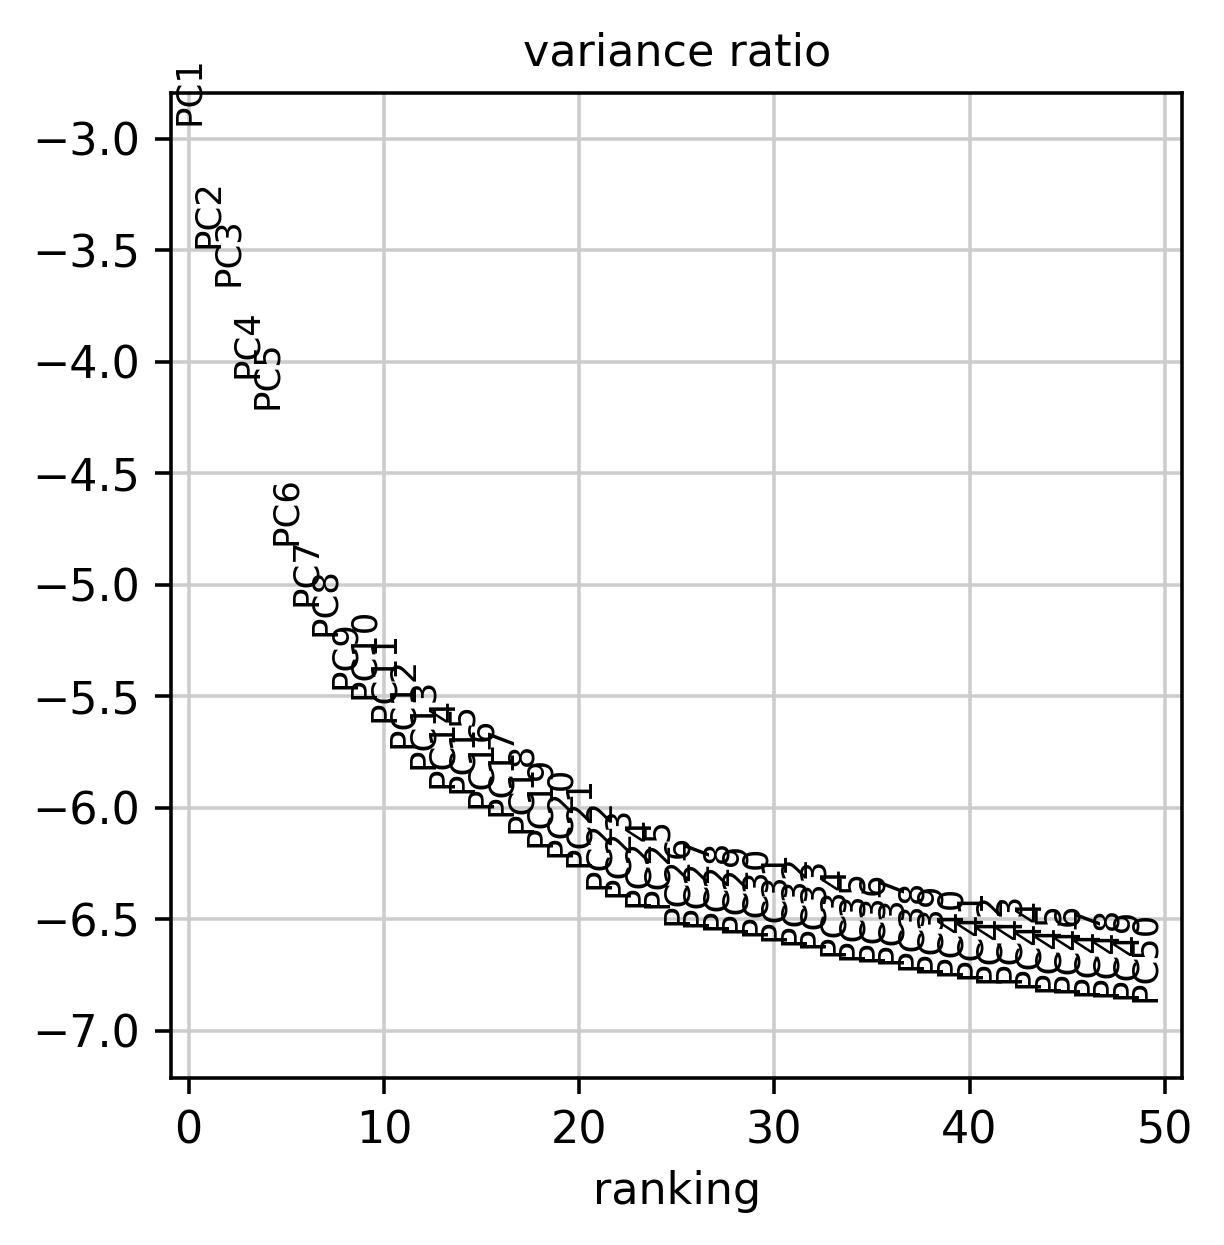

In [23]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs =50)

In [24]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:59)


In [26]:
# sc.tl.paga(adata)
# sc.pl.paga(adata)  # remove `plot=False` if you want to see the coarse-grained graph
# sc.tl.umap(adata, init_pos='paga')
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:06:24)


In [27]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 50 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:02:13)


## vis marker gene and anno cell type 

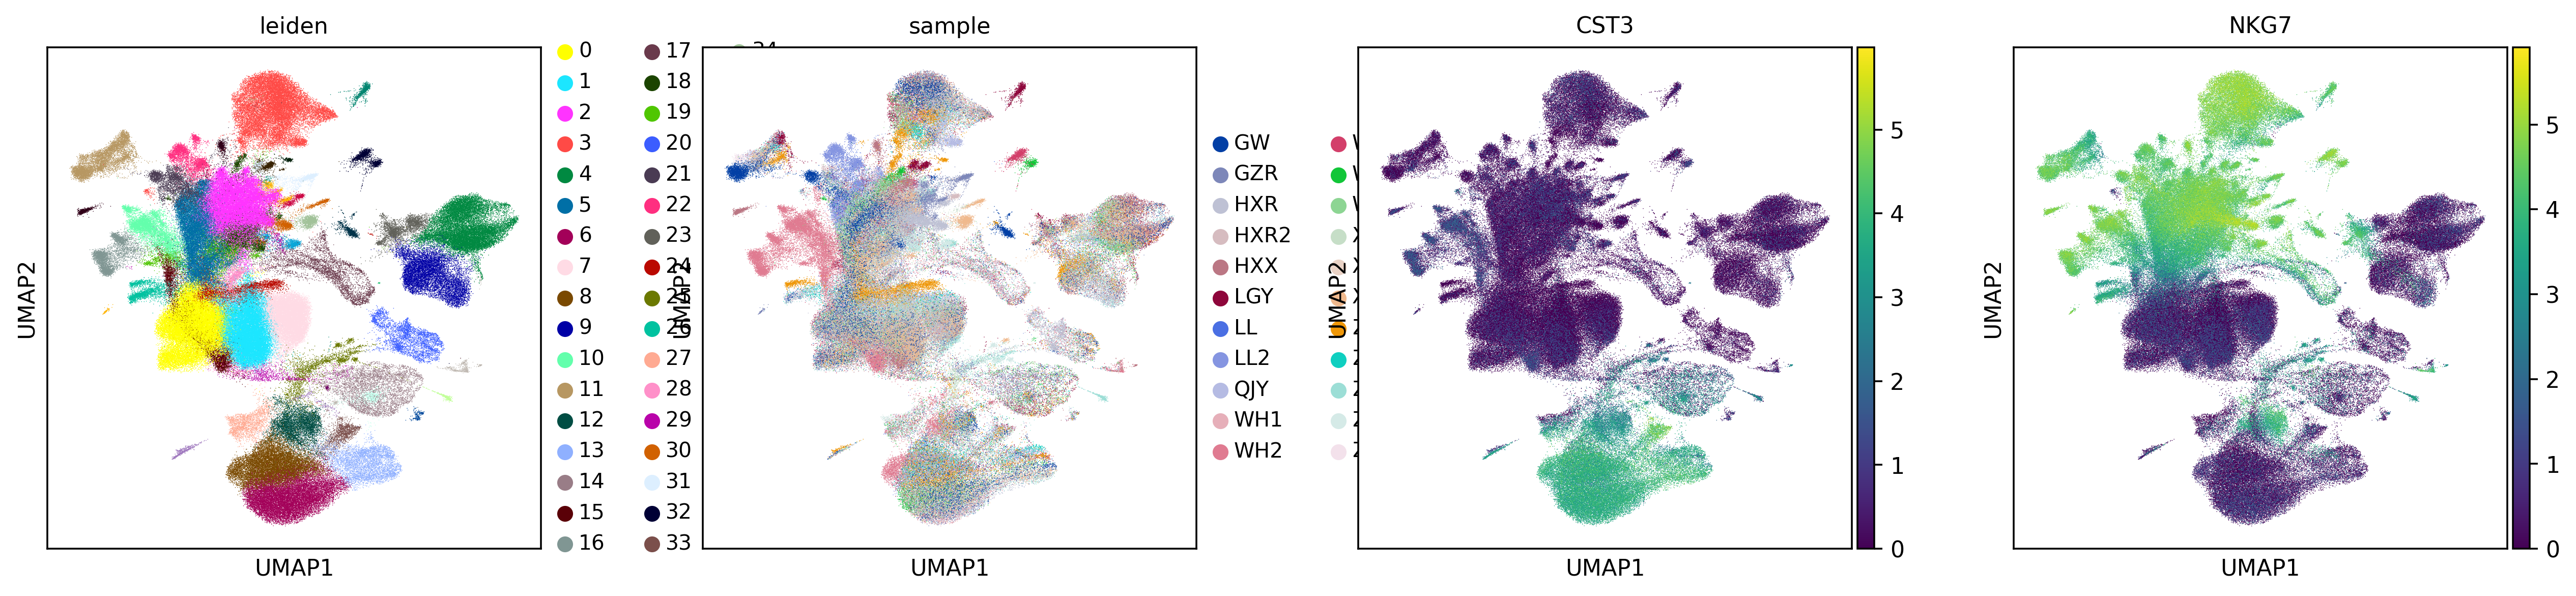

In [28]:
sc.pl.umap(adata, color=['leiden','sample', 'CST3', 'NKG7'])

In [29]:
adata.write(results_file, compression='gzip') 

In [1]:
dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'quit']